In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("datos_base.xlsx")

In [ ]:
df

# Limpieza

In [ ]:
print(df.isnull().sum())
print(f'\nDuplicados:{df.duplicated().sum()}')

In [ ]:
df.dtypes

### Conversion de columna a fecha

In [ ]:
df['nombre_del_dia'] = df['Dia del Mes'].str.split(', ').str[0]
df['Dia del Mes'] = df['Dia del Mes'].str.split(', ').str[1]

In [ ]:
# Cambio de columna 'Dia del mes' a formato fecha
month_mapping = {'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7,
                     'Agosto': 8, 'Setiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12}

df[['dia','mes','año']] =df['Dia del Mes'].str.split(' de ', expand = True)
df['mes'] = df['mes'].replace(month_mapping)
df['fecha'] = df['dia'].astype(str) + "/" + df['mes'].astype(str) + "/" + df['año'].astype(str)
df['fecha'] = pd.to_datetime(df['fecha'], format = '%d/%m/%Y')

### Distribuciones y outliers

In [ ]:
def distr_values(variable, dataframe, titulo = ""):
    fig, ax = plt.subplots(1,2, figsize=(7,3))

    fig.suptitle(titulo, y = 1.05)

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = dataframe, x = f"{variable}", kde = True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=dataframe, x = f"{variable}", ax = ax[1])

In [ ]:
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Facturación',sub_df, titulo = f'Marca {marca}')

In [ ]:
#Distribuciones de Cantidad
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Cantidad',sub_df, titulo = f'Marca {marca}')

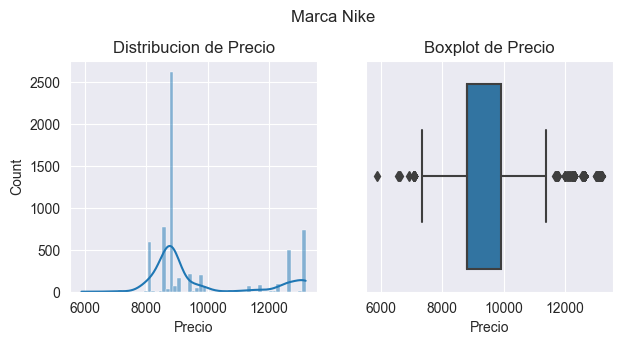

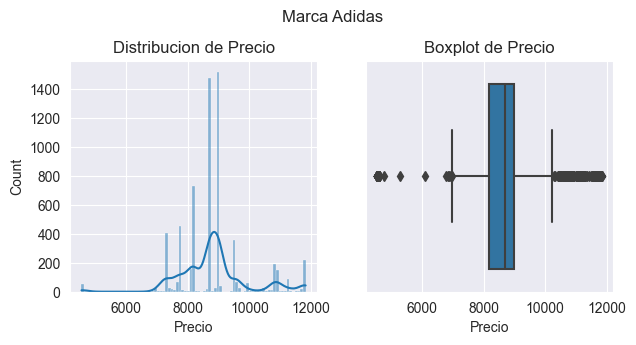

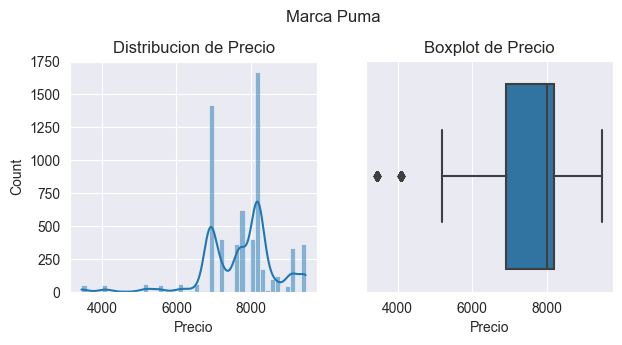

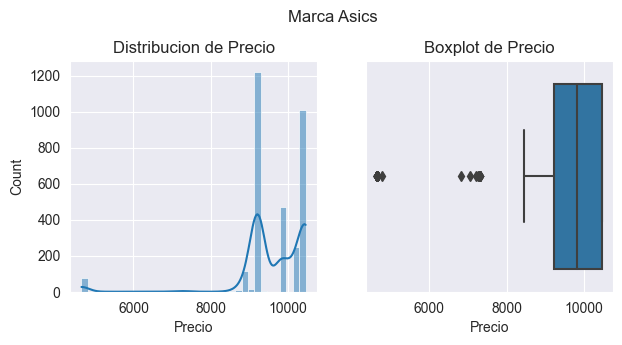

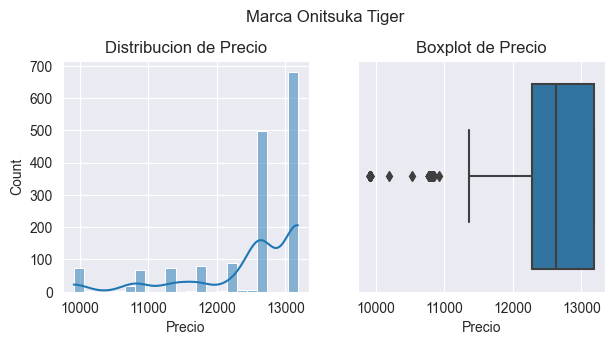

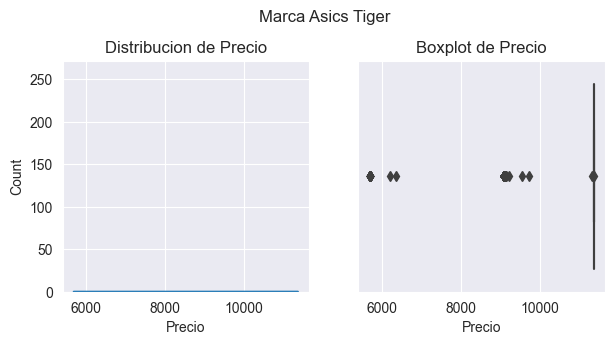

In [ ]:
#Distribuciones de Precio
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Precio',sub_df, titulo = f'Marca {marca}')

# Analisis

In [43]:
df['semana_año'] = +df['Año'].astype(str) + "_"  +df['Nombre Semana'].str.split(" ").str[1]
df['semana_año'] = pd.to_datetime(df['semana_año'] + '_1', format='%Y_%W_%w').dt.strftime('%Y_%W')

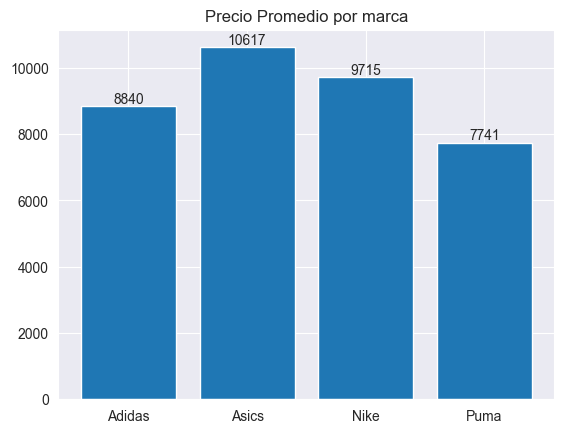

In [44]:
marca_precio_promedio = df.groupby(by = ['Marca']).agg({"Precio": "mean"})

plt.bar(marca_precio_promedio.index, marca_precio_promedio['Precio'])

for i, value in enumerate(marca_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom')

plt.title('Precio Promedio por marca')
plt.show()

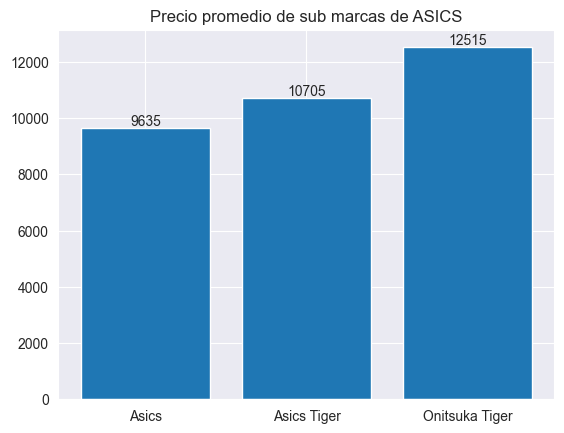

In [45]:
df_asics = df[df['Marca'] == 'Asics']
submarcas_precio_promedio = df_asics.groupby(by = 'Sub Marca').agg({'Precio':'mean'})

df_sub_asics = df[df['Sub Marca'] == 'Asics']
df_sub_asics.groupby(by = "Segmento").agg({'Precio':'mean'})

plt.bar(submarcas_precio_promedio.index, submarcas_precio_promedio['Precio'])

for i, value in enumerate(submarcas_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom')

plt.title('Precio promedio de sub marcas de ASICS')
plt.show()

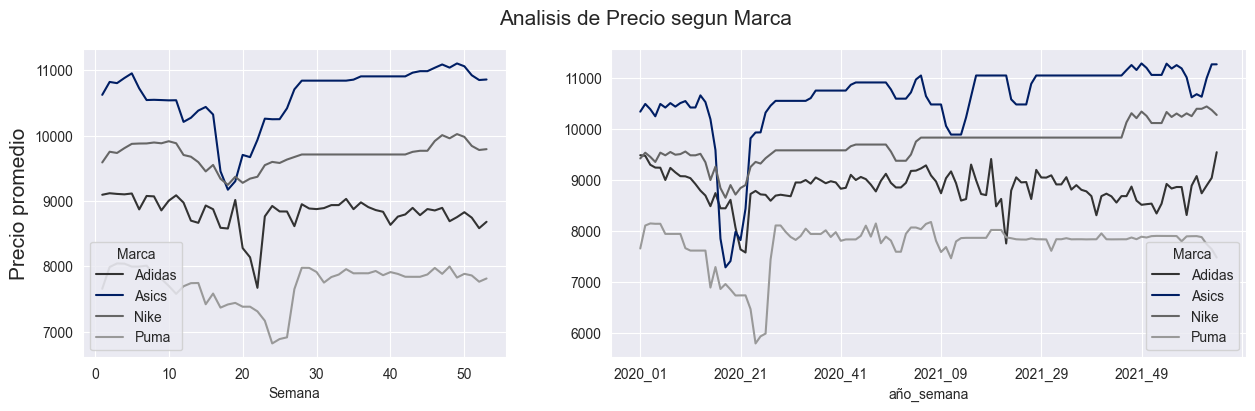

In [46]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

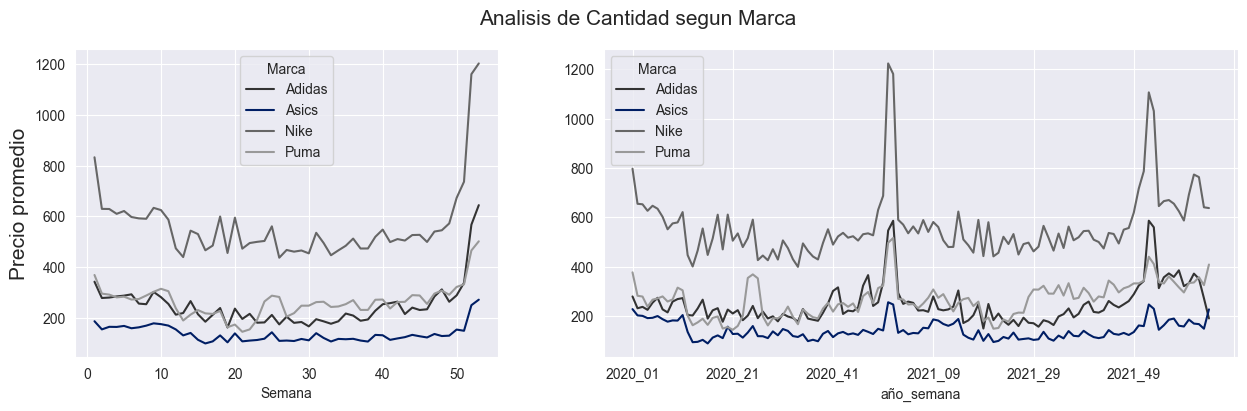

In [47]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Cantidad'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

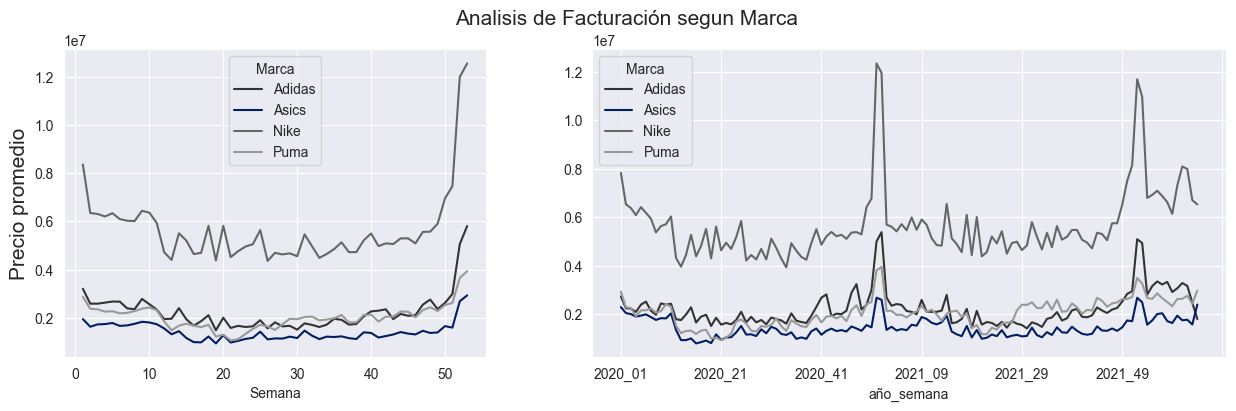

In [48]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

Exprimentan fuertes subas a fin de año, ASICS deberia hacer algo al respecto, parece ser la que menos crece.

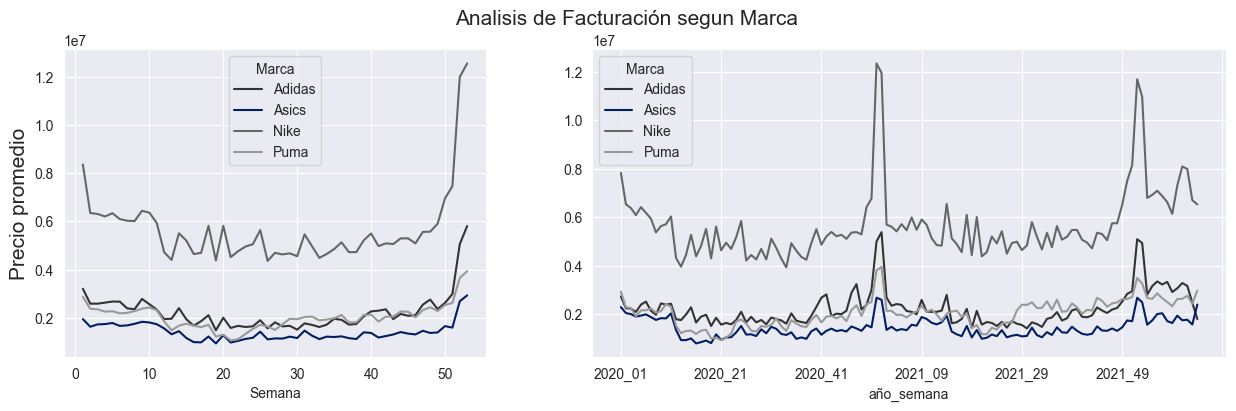

In [49]:
colors = ['#333333', '#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()


In [50]:
def running_o_deportes(row):
    if (row['Segmento'] == 'Running') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_running'
    elif (row['Segmento'] == 'O. Deportes') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_deportes'
    else:
        return row['Sub Marca']

df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)

C:\Users\agusd\AppData\Local\Temp\ipykernel_13800\3971053450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)


In [51]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,nombre_del_dia,dia,mes,año,fecha,semana_año
0,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike,Jueves,2,1,2020,2020-01-02,2020_01
1,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike,Jueves,2,1,2020,2020-01-02,2020_01
2,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike,Jueves,2,1,2020,2020-01-02,2020_01
3,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike,Jueves,2,1,2020,2020-01-02,2020_01
4,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike,Jueves,2,1,2020,2020-01-02,2020_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics,Sabado,26,2,2022,2022-02-26,2022_09
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger,Sabado,26,2,2022,2022-02-26,2022_09


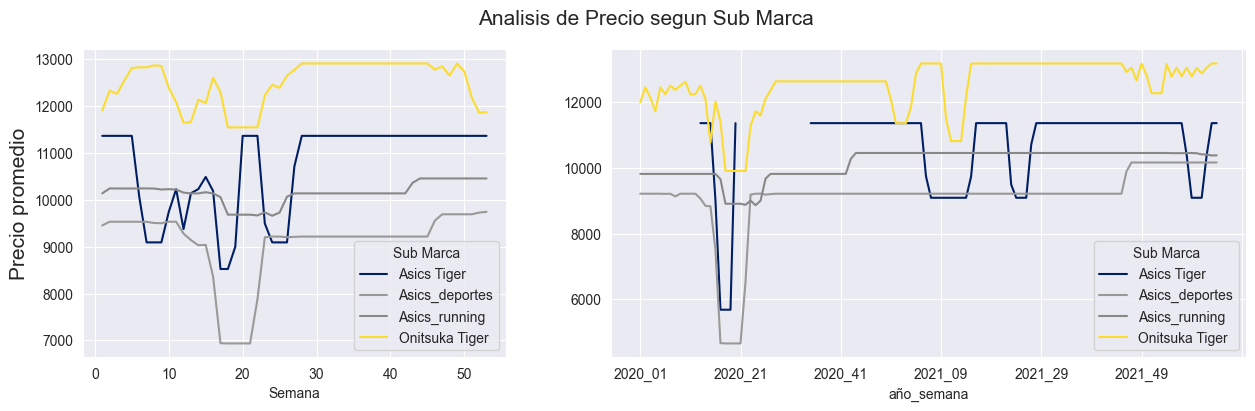

In [52]:
colors = ['#001e64', '#999999', '#888888', '#FBDC2F']

analisis = 'Sub Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df_asics.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()

In [53]:
df_asics = df[df["Marca"] == "Asics"]

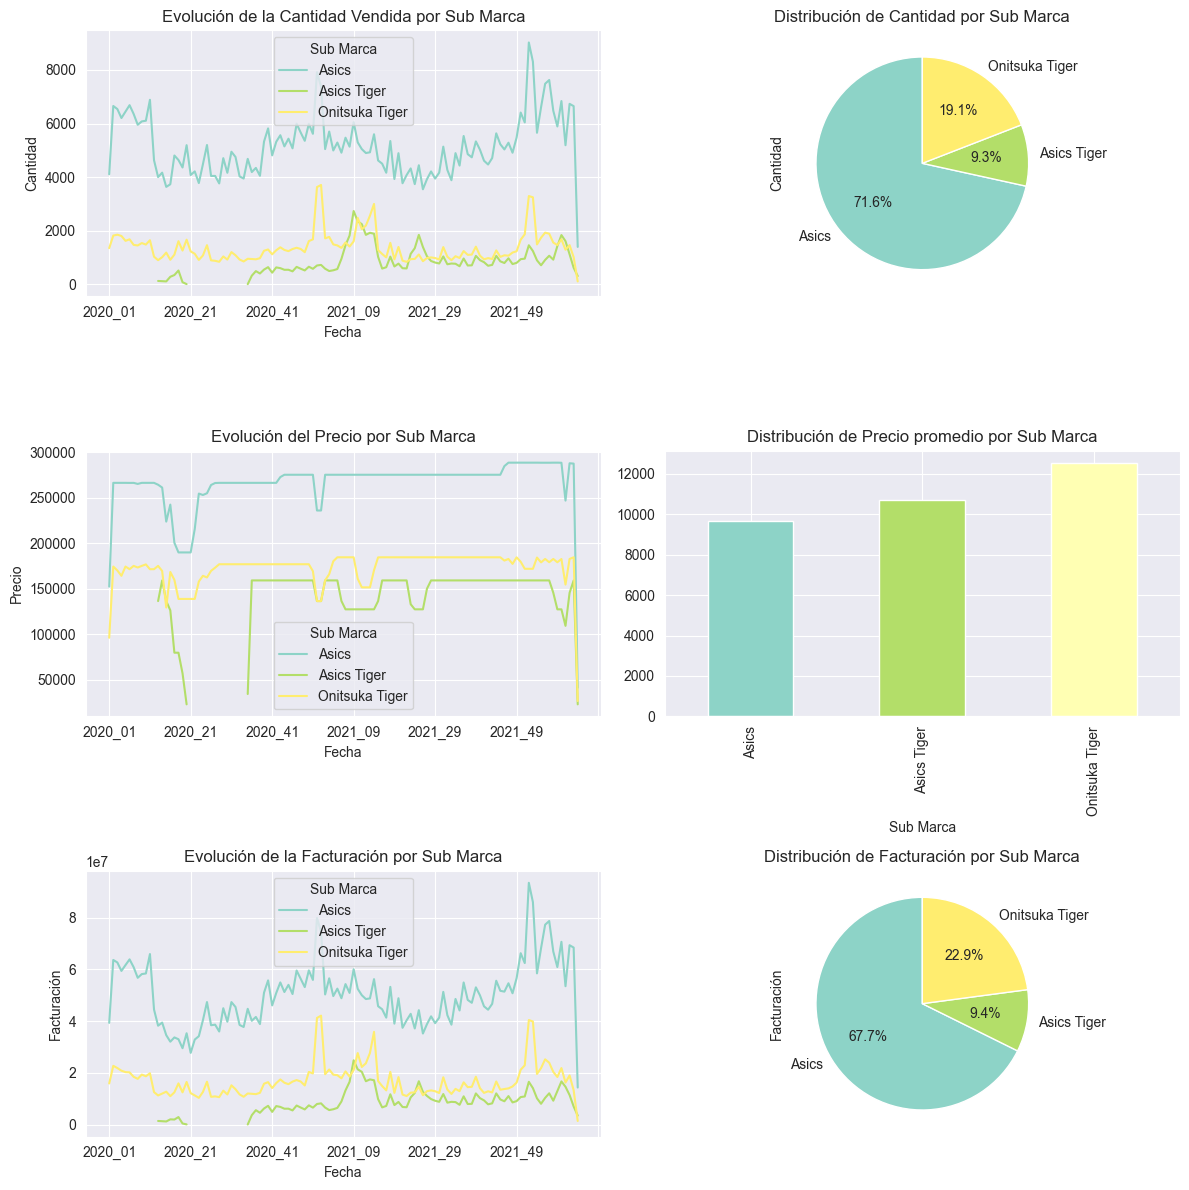

In [54]:
# Definir la categoría
categoria = "Sub Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

In [55]:
df_asics.groupby(['Sub Marca', 'Segmento']).agg(cantidad = ('Cantidad', 'sum'))

cantidad
Sub Marca      Segmento             
Asics          O. Deportes    246073
               Running        350632
Asics Tiger    Social          77911
Onitsuka Tiger Social         159305

Cuenta con tres submarcas: **Asics Onitsuka Tiger y Ascs Tiger**, siendo que la primera esta enfocada en deportes (running y otros deportes) y las dos últimas en lifestyle (social).

Asics es al sub marca que vende mayor cantidad (72%), siendo pro lo tanto la que más factura, habiendo generado el 68% de los ingresos del periodo). Sin embargo, Onitsuka Tiger es la de mayor precio promedio, siendo que la categoría social tiene productos de mayor precios


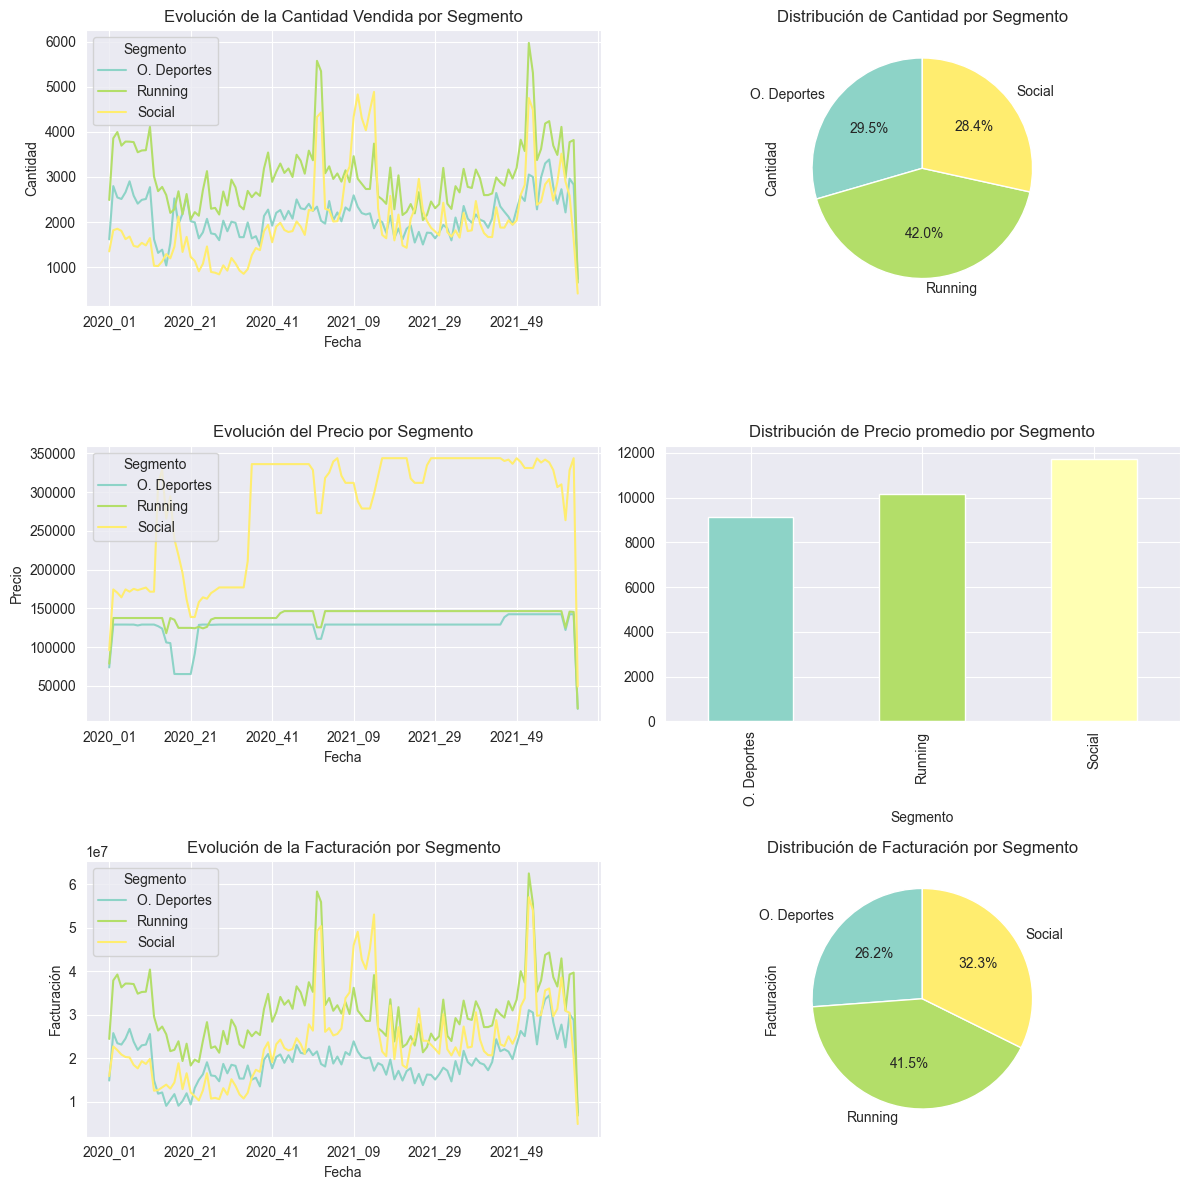

In [56]:
# Definir la categoría
categoria = "Segmento"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El segmento del cual más se venden es running, siendo social el de mayor cantidad vendida, mientras que social es le segmento de mayor precio promedio, llevando a que el segmento de mayor facturación sea running (41,5%), seguido por social (32,3%)

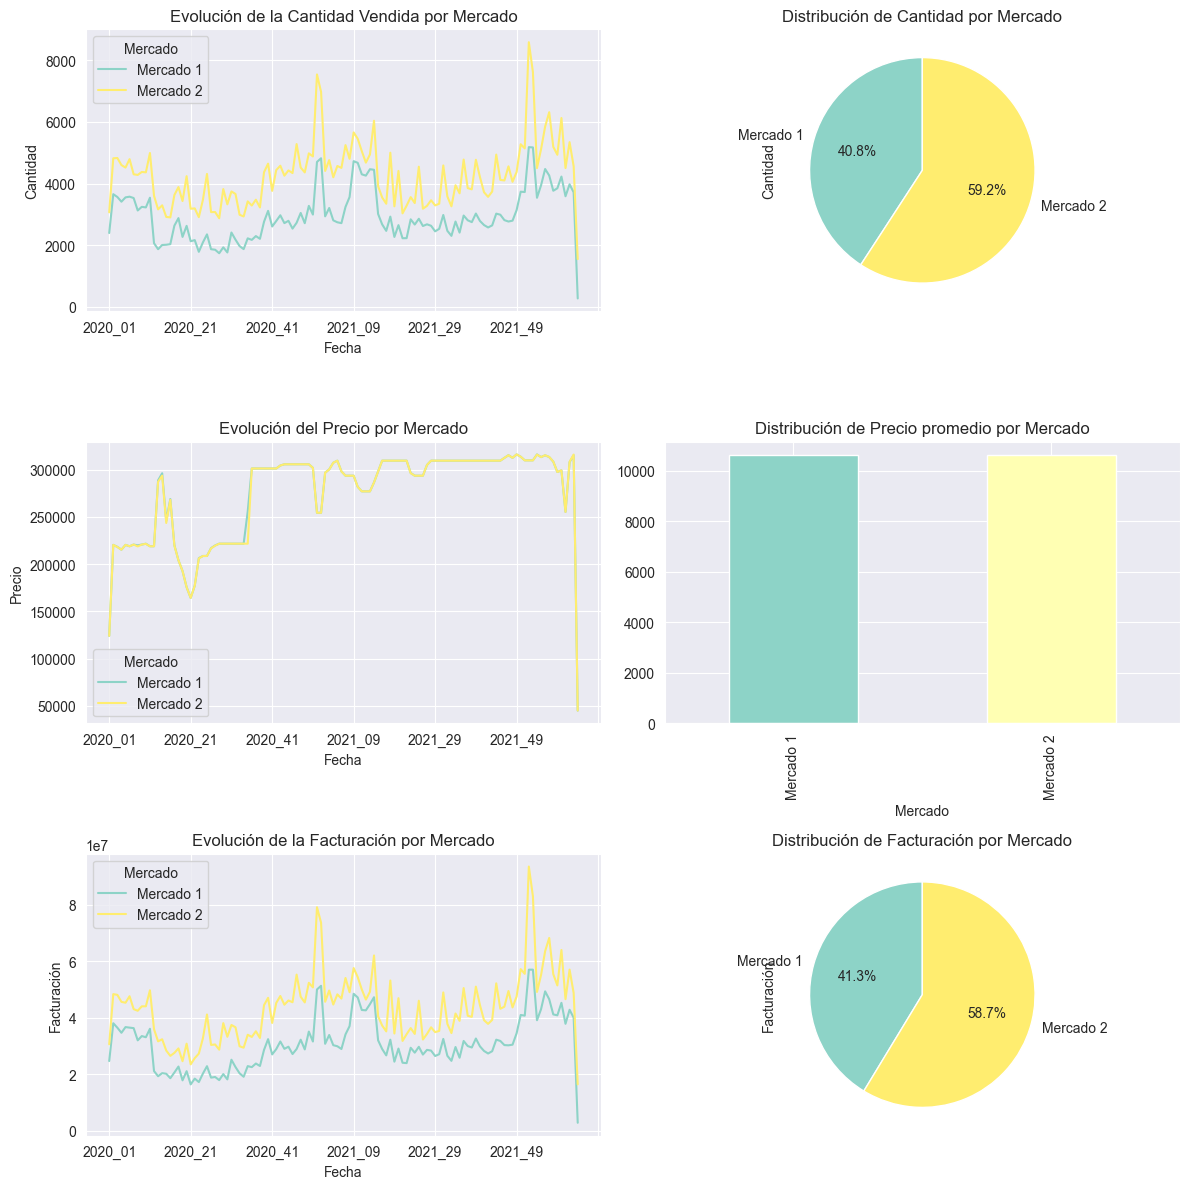

In [57]:
# Definir la categoría
categoria = "Mercado"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#FFFFB3', '#B3DE69', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

La distinción de mercado parecería no tener tanta relevancia, como vemos el precio es igual en ambos mercados (tiene sentido ya que es el mismo país), siendo que se vende mayor cantidad y se factura mas en el Mercado 2.

In [111]:
pivot_gral = df.pivot_table(index = 'fecha', columns= ['Sub Marca'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas = []
for i in pivot_gral.columns:
    columnas_nuevas.append(i[0] + "_" + i[1])

pivot_gral.columns = columnas_nuevas
pivot_gral.drop(['Precio_Asics Tiger','Cantidad_Asics Tiger'], axis=1, inplace=True)
pivot_gral = pivot_gral.dropna()


,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Onitsuka Tiger,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Onitsuka Tiger,Precio_Puma
0,2020-01-02,1561.0,831.0,4835.0,213.0,2314.0,9489.157783,9516.433979,9585.245044,12636.005814,7522.432601
1,2020-01-03,1843.0,972.0,5481.0,235.0,2723.0,9487.852832,9516.422683,9585.251769,12636.021797,7704.230923
2,2020-01-04,2736.0,1257.0,7336.0,435.0,3514.0,9490.839063,9516.419603,9267.243383,11363.980763,7704.253431
3,2020-01-05,2775.0,1045.0,7842.0,466.0,3490.0,9490.978511,9516.418612,9267.250479,11363.993746,7704.262270
4,2020-01-06,1389.0,714.0,4368.0,195.0,2028.0,9491.601134,9516.428464,9267.237789,11363.977638,7704.198374
...,...,...,...,...,...,...,...,...,...,...,...
795,2022-03-10,1673.0,719.0,3769.0,90.0,2545.0,8680.411563,10262.403327,10393.880150,13181.971154,7470.328893
796,2022-03-11,2104.0,922.0,4448.0,151.0,2161.0,8674.982211,10258.503346,10282.046053,13181.993151,7407.862191
797,2022-03-12,3766.0,1557.0,6349.0,273.0,3125.0,8674.874095,10284.922908,10282.714945,13181.986136,7466.574916
798,2022-03-13,3277.0,1144.0,5948.0,159.0,2900.0,8674.787537,10271.071759,10276.012752,13182.000000,7506.338224


In [118]:
X = pivot_gral[['Precio_Adidas','Precio_Asics', 'Precio_Onitsuka Tiger', 'Precio_Puma']]
X = sm.add_constant(X)
y = pivot_gral['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     26.47
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.25e-20
Time:                        00:44:57   Log-Likelihood:                -5641.7
No. Observations:                 799   AIC:                         1.129e+04
Df Residuals:                     794   BIC:                         1.132e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1530.70

In [159]:
pivot_sub_segmento = df.pivot_table(index = 'fecha', columns= ['Sub Marca','Segmento'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()


In [160]:
columnas_nuevas_sub_seg = []
for i in pivot_sub_segmento.columns:
   columnas_nuevas_sub_seg.append(i[0] + "_" + i[1] + "_" + i[2])

pivot_sub_segmento.columns = columnas_nuevas_sub_seg

In [161]:
pivot_sub_segmento = pivot_sub_segmento.drop(['Precio_Asics Tiger_Social','Cantidad_Asics Tiger_Social'], axis=1)
pivot_sub_segmento = pivot_sub_segmento.dropna()

In [162]:
pivot_sub_segmento.columns

Index(['fecha__', 'Cantidad_Adidas_Futbol', 'Cantidad_Adidas_O. Deportes',
       'Cantidad_Adidas_Running', 'Cantidad_Adidas_Social',
       'Cantidad_Asics_O. Deportes', 'Cantidad_Asics_Running',
       'Cantidad_Nike_Futbol', 'Cantidad_Nike_O. Deportes',
       'Cantidad_Nike_Running', 'Cantidad_Nike_Social',
       'Cantidad_Onitsuka Tiger_Social', 'Cantidad_Puma_Futbol',
       'Cantidad_Puma_O. Deportes', 'Cantidad_Puma_Running',
       'Cantidad_Puma_Social', 'Precio_Adidas_Futbol',
       'Precio_Adidas_O. Deportes', 'Precio_Adidas_Running',
       'Precio_Adidas_Social', 'Precio_Asics_O. Deportes',
       'Precio_Asics_Running', 'Precio_Nike_Futbol', 'Precio_Nike_O. Deportes',
       'Precio_Nike_Running', 'Precio_Nike_Social',
       'Precio_Onitsuka Tiger_Social', 'Precio_Puma_Futbol',
       'Precio_Puma_O. Deportes', 'Precio_Puma_Running', 'Precio_Puma_Social'],
      dtype='object')

In [165]:
X = pivot_sub_segmento[['Precio_Adidas_Futbol',
       'Precio_Adidas_O. Deportes', 'Precio_Adidas_Running',
       'Precio_Adidas_Social', 'Precio_Asics_O. Deportes',
       'Precio_Asics_Running',
       'Precio_Nike_Futbol', 'Precio_Nike_O. Deportes', 'Precio_Nike_Running',
       'Precio_Nike_Social', 'Precio_Onitsuka Tiger_Social',
       'Precio_Puma_Futbol', 'Precio_Puma_O. Deportes', 'Precio_Puma_Running',
       'Precio_Puma_Social']]
X = sm.add_constant(X)
y = pivot_sub_segmento['Cantidad_Asics_Running']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())
#quitar las cols con p-value mayor a 0.15

                              OLS Regression Results                              
Dep. Variable:     Cantidad_Asics_Running   R-squared:                       0.259
Model:                                OLS   Adj. R-squared:                  0.245
Method:                     Least Squares   F-statistic:                     18.04
Date:                    Mon, 20 Nov 2023   Prob (F-statistic):           2.57e-41
Time:                            01:11:50   Log-Likelihood:                -5276.2
No. Observations:                     789   AIC:                         1.058e+04
Df Residuals:                         773   BIC:                         1.066e+04
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

# Por segmento

In [109]:
df_running = df[df['Segmento'] == 'Running']

pivot_running = df_running.pivot_table(index = 'fecha', columns= ['Sub Marca'], values = ['Cantidad','Precio'], aggfunc={'Cantidad':'sum', 'Precio':'mean'}).reset_index()

columnas_nuevas = []
for i in pivot_running.columns:
    columnas_nuevas.append(i[0] + "_" + i[1])

pivot_running.columns = columnas_nuevas


In [107]:
pivot_running = pivot_running.dropna()
pivot_running

,fecha_,Cantidad_Adidas,Cantidad_Asics,Cantidad_Nike,Cantidad_Puma,Precio_Adidas,Precio_Asics,Precio_Nike,Precio_Puma
0,2020-01-02,454.0,434.0,1181.0,491.0,8700.911991,9818.006667,8090.994090,7727.011927
1,2020-01-03,475.0,529.0,1345.0,610.0,8700.840541,9818.007293,8090.995361,7727.028016
2,2020-01-04,594.0,820.0,1776.0,909.0,8700.825962,9818.005608,8090.995696,7727.007421
3,2020-01-05,490.0,706.0,1797.0,986.0,8700.829547,9818.004163,8090.999042,7727.005938
4,2020-01-06,452.0,324.0,994.0,491.0,8700.860797,9818.002793,8090.994790,7727.011146
...,...,...,...,...,...,...,...,...,...
795,2022-03-10,318.0,395.0,1274.0,424.0,8700.840881,10359.288431,8862.941295,7740.229966
796,2022-03-11,281.0,551.0,1634.0,515.0,8700.774682,10351.478944,8874.987985,7727.006197
797,2022-03-12,493.0,992.0,2082.0,733.0,8700.673296,10404.377878,8877.495600,7727.006752
798,2022-03-13,334.0,799.0,2157.0,791.0,8700.649230,10376.613023,8863.981188,7727.009514


In [108]:
X = pivot_running[['Precio_Adidas', 'Precio_Nike', 'Precio_Puma']]
X = sm.add_constant(X)
y = pivot_running['Cantidad_Asics']

model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Cantidad_Asics   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     29.89
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.56e-18
Time:                        00:41:06   Log-Likelihood:                -5419.7
No. Observations:                 799   AIC:                         1.085e+04
Df Residuals:                     795   BIC:                         1.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           196.3228    242.646      0.809